# Exploratory Data Analysis Starter

## Import packages

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)

---

## Loading data with Pandas

We need to load `client_data.csv` and `price_data.csv` into individual dataframes so that we can work with them in Python. For this notebook and all further notebooks, it will be assumed that the CSV files will the placed in the same file location as the notebook. If they are not, please adjust the directory within the `read_csv` method accordingly.

In [2]:
client_df = pd.read_csv('./client_data.csv')
price_df = pd.read_csv('./price_data.csv')

You can view the first 3 rows of a dataframe using the `head` method. Similarly, if you wanted to see the last 3, you can use `tail(3)`

In [3]:
client_df.head(3)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0


In [4]:
price_df.head(3)

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0


---

## Descriptive statistics of data

### Data types

It is useful to first understand the data that you're dealing with along with the data types of each column. The data types may dictate how you transform and engineer features.

To get an overview of the data types within a data frame, use the `info()` method.

In [5]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [6]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


### Statistics

Now let's look at some statistics about the datasets. We can do this by using the `describe()` method.

In [7]:
client_df.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097152
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296175
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000


In [8]:
price_df.describe()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
std,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


## Sub-Task 1

### Exploratory Data Analysis

Lets check for some variable distrubutions to find any insights. Plotting distributions for key variables: `cons_12m`, `net_margin`, and `churn`.

The reason for choosing `cons_12m` and `net_margin` because these can be considered as core business metrics. `cons_12m` represents the electricity consumption of clients, a key indicator of client activity and engagement with the utility provider. Understanding its distribution might help in identifying consumption patterns, which are crucial for business strategies. `net_margin` reflects the financial health and profitability from each client. Analyzing its distribution provides insights into the financial performance of the business and helps in identifying how profit is distributed across different clients.


Understanding the distribution of these metrics can be informative when considering client retention (churn). For instance, if most high-value clients (in terms of net margin or consumption) are retained, the company's strategies might be effective. Conversely, if churn is high among certain segments, this might help in further investigation.

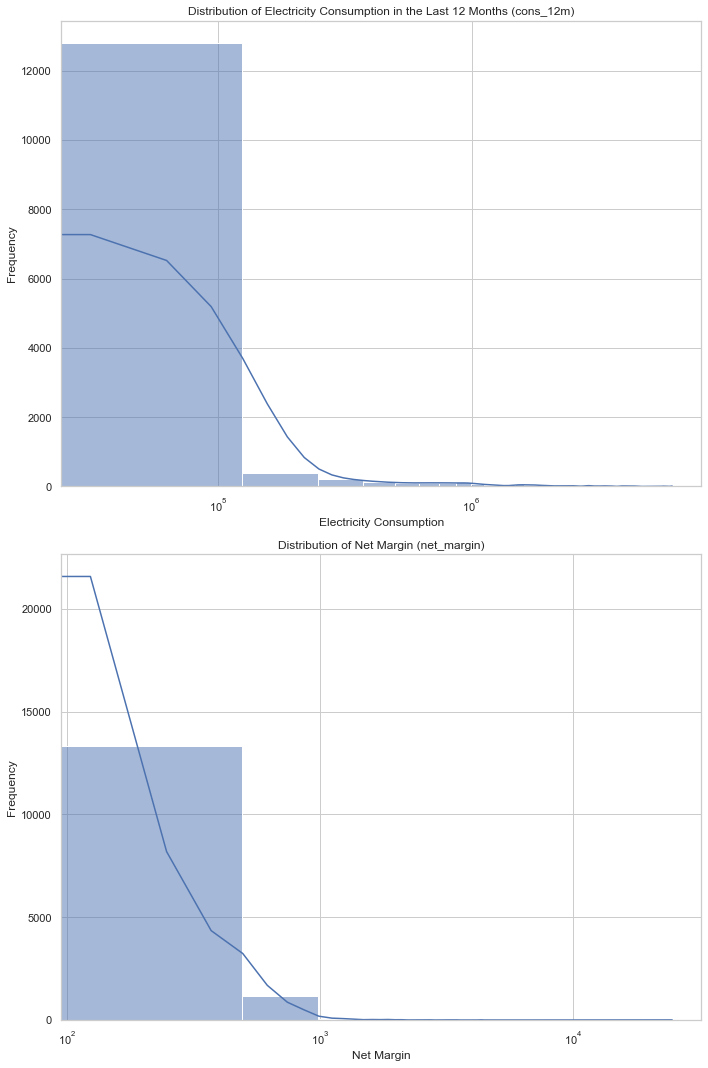

In [9]:
sns.set(style="whitegrid")


fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 15))

# Electricity consumption in the last 12 months (cons_12m)
sns.histplot(client_df['cons_12m'], bins=50, ax=axes[0], kde=True)
axes[0].set_title('Distribution of Electricity Consumption in the Last 12 Months (cons_12m)')
axes[0].set_xlabel('Electricity Consumption')
axes[0].set_ylabel('Frequency')
axes[0].set_xscale('log') # Using logarithmic scale due to wide range of values


# Total net margin (net_margin)
sns.histplot(client_df['net_margin'], bins=50, ax=axes[1], kde=True)
axes[1].set_title('Distribution of Net Margin (net_margin)')
axes[1].set_xlabel('Net Margin')
axes[1].set_ylabel('Frequency')
axes[1].set_xscale('log') # Using logarithmic scale due to wide range of values

plt.tight_layout()
plt.show()

Electricity Consumption (`cons_12m`): The distribution is heavily right-skewed, indicating that most clients have relatively low electricity consumption, but there are a few with exceptionally high consumption.

Net Margin (`net_margin`):Similar to electricity consumption, the distribution of net margin is also right-skewed. Most clients have lower net margins, but there are outliers with very high net margins.



In [10]:
# Correlation analysis 
correlation_data = client_df[['cons_12m', 'net_margin', 'churn']].corr()
correlation_data

,cons_12m,net_margin,churn
cons_12m,1.000000,0.133614,-0.045968
net_margin,0.133614,1.000000,0.041135
churn,-0.045968,0.041135,1.000000


Cons_12m (Electricity Consumption) vs. Net Margin: There is a positive correlation (0.13) between electricity consumption and net margin. This suggests that higher consumption is generally associated with higher net margins, which is expected in a utility context.


Churn vs. Cons_12m and Net Margin: The correlation between churn and both electricity consumption and net margin is very weak (close to zero). ***This indicates that these factors may not be strong predictors of churn in isolation.***

Since we got weaker correlations let us explore other parameters.

Now lets try to analyze the influence on churn in two approaches.
1. Correlation analysis for numerical variables
2. Categorical Variable Analysis

***1. Correlation analysis for numerical variables***

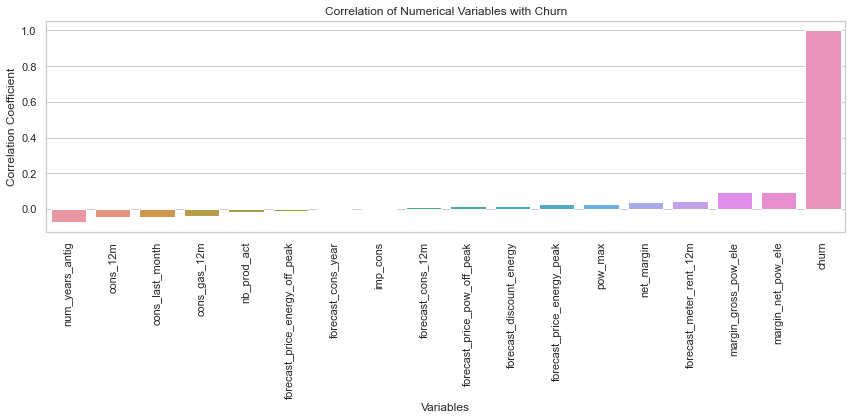

In [11]:
# Selecting numerical variables
numerical_columns = client_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_columns.remove('churn')  # Removing churn from the list to avoid self-correlation

# Calculating correlation of numerical variables with churn
correlation_with_churn = client_df[numerical_columns + ['churn']].corr()['churn'].sort_values()

# Visualizing correlations with churn
plt.figure(figsize=(12, 6))
sns.barplot(x=correlation_with_churn.index, y=correlation_with_churn.values)
plt.xticks(rotation=90)
plt.title('Correlation of Numerical Variables with Churn')
plt.xlabel('Variables')
plt.ylabel('Correlation Coefficient')
plt.tight_layout()
plt.show()

***Interpretations from above plot***

Margins and Net Margin: ***The slight positive correlation with `margin_gross_pow_ele` and `margin_net_pow_ele` might imply that clients with higher margins are slightly more at risk of churning.*** This could be due to various factors such as pricing sensitivity, competitive offers from other companies, or dissatisfaction with the service. We have to further analyze it.


Client Antiquity: The negative correlation with num_years_antig might indicate a tendency for more established clients to stay with the company, possibly due to loyalty, satisfaction, or the inconvenience associated with changing providers.

***2. Categorical Variable Analysis:***

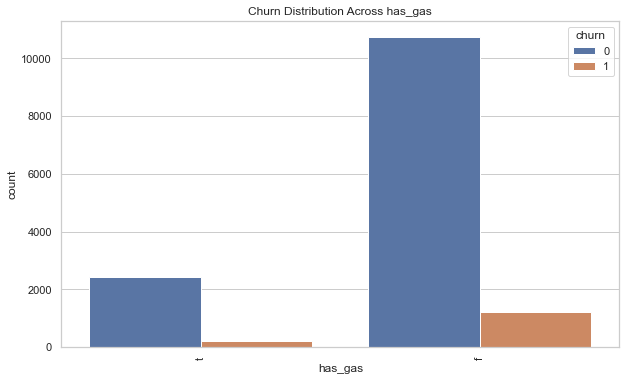

In [12]:
# Select a categorical variable
categorical_var = 'has_gas' 

# Count plot for churn across the categorical variable
plt.figure(figsize=(10, 6))
sns.countplot(x=categorical_var, hue='churn', data=client_df)
plt.title(f'Churn Distribution Across {categorical_var}')
plt.xticks(rotation=90)
plt.show()

***Clients with gas services seem to have a lower proportion of churn compared to those without. This might indicate that clients taking advantage of multiple services (both electricity and gas) are more likely to stay with the company***

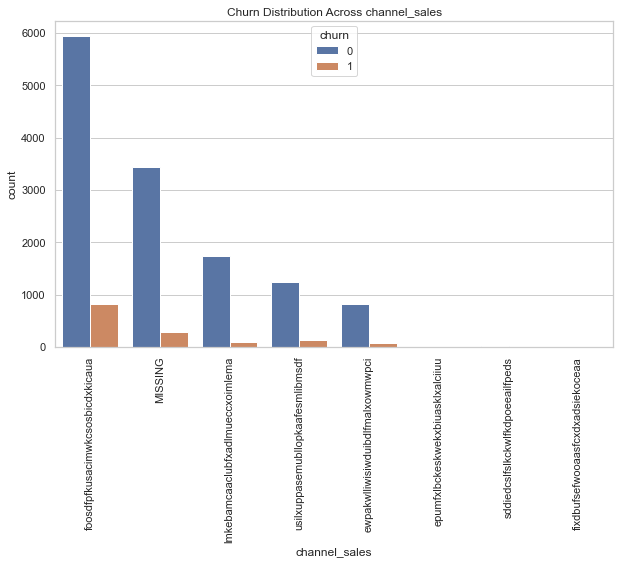

In [13]:
categorical_var = 'channel_sales' 

# Count plot for churn across the categorical variable
plt.figure(figsize=(10, 6))
sns.countplot(x=categorical_var, hue='churn', data=client_df)
plt.title(f'Churn Distribution Across {categorical_var}')
plt.xticks(rotation=90)
plt.show()

Channel Effectiveness: Channels with a lower churn rate might be providing a better customer experience or have more effective sales and follow-up processes.

The presence of a MISSING category indicates that some sales data is not recorded.

***Customer Engagement: The variation in churn by sales channel could inform strategies to enhance customer engagement and retention. Analyzing the characteristics of channels with lower churn could provide insights into successful practices.***

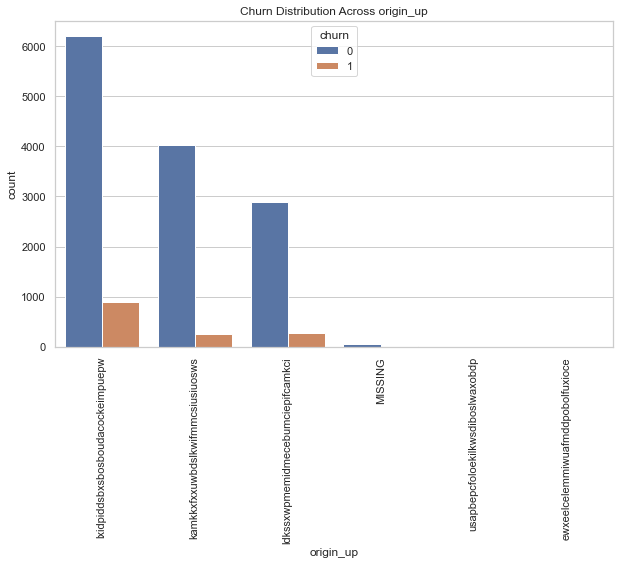

In [14]:
categorical_var = 'origin_up' 

# Count plot for churn across the categorical variable
plt.figure(figsize=(10, 6))
sns.countplot(x=categorical_var, hue='churn', data=client_df)
plt.title(f'Churn Distribution Across {categorical_var}')
plt.xticks(rotation=90)
plt.show()

Campaign Effectiveness: The varying churn rates suggest that some campaigns might be more effective at acquiring and retaining customers. Marketing and customer acquisition strategies associated with these codes might have been more successful.

The presence of a MISSING category suggests there might be data quality issues that need to be addressed. It's also a reminder to consider whether the lack of information could be influencing churn.

***The differences in churn by campaign code could be useful for customer segmentation. Understanding the characteristics of campaigns with lower churn could inform future marketing strategies and customer engagement models.***

We have some date features in the dataset, lets convert them into datetime format to perform some nuanced time-series analysis.

In [15]:
client_df['date_activ'] = pd.to_datetime(client_df['date_activ'])
client_df['date_end'] = pd.to_datetime(client_df['date_end'])
client_df['date_modif_prod'] = pd.to_datetime(client_df['date_modif_prod'])
client_df['date_renewal'] = pd.to_datetime(client_df['date_renewal'])

***1. Customer Tenure Analysis***

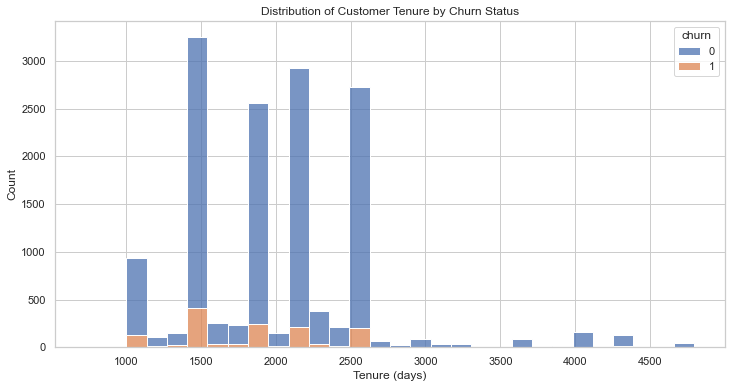

In [16]:
plt.figure(figsize=(12, 6))
client_df['tenure'] = (client_df['date_end'] - client_df['date_activ']).dt.days
# Handling negative tenures in case of data errors
client_df['tenure'] = client_df['tenure'].apply(lambda x: x if x >= 0 else None)

# Distribution of tenure across churned and non-churned customers
sns.histplot(data=client_df, x='tenure', hue='churn', multiple='stack', bins=30)
plt.title('Distribution of Customer Tenure by Churn Status')
plt.xlabel('Tenure (days)')
plt.ylabel('Count')
plt.show()

The higher churn rates in the early tenure ranges could point to a critical period where customers are deciding whether to continue their relationship with the company.

***Retention Focus: The data indicates that efforts to retain customers could be particularly crucial in the early years (1000-2000 days).***
 

***2. Contract Renewal Analysis***

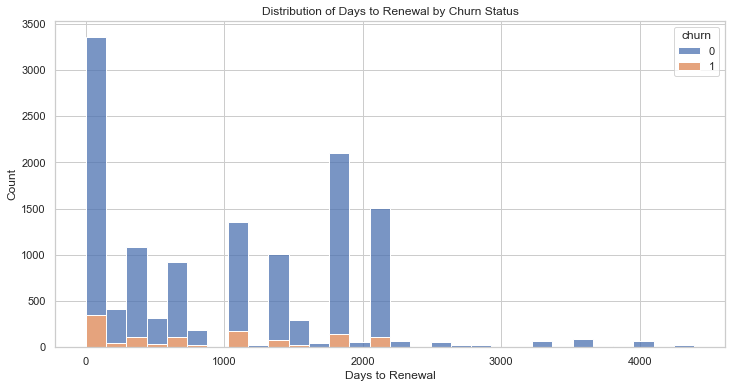

In [17]:
plt.figure(figsize=(12, 6))
client_df['days_to_renewal'] = (client_df['date_renewal'] - client_df['date_modif_prod']).dt.days
# Handling negative days to renewal in case of data errors
client_df['days_to_renewal'] = client_df['days_to_renewal'].apply(lambda x: x if x >= 0 else None)

# Distribution of days to renewal across churned and non-churned customers
sns.histplot(data=client_df, x='days_to_renewal', hue='churn', multiple='stack', bins=30)
plt.title('Distribution of Days to Renewal by Churn Status')
plt.xlabel('Days to Renewal')
plt.ylabel('Count')
plt.show()

***The peak at 0 days could indicate that customers are more likely to churn around the time of contract renewal, which may be due to considering alternative providers or evaluating their current service's value.***


***Periodic Review: Customers may be assessing their contracts periodically, not just at renewal, which could explain why we see churn happening at various stages, not just clustered around the renewal date.***


The low churn rates with a higher number of days to renewal could imply that customers with longer contracts or those who are not close to a renewal period feel more secure or satisfied with their service, leading to lower churn rates. The company may need to focus on engagement and retention strategies well before the contract renewal period, as the data suggests that churn occurs leading up to the renewal date.



***3. Time Since Last Modification Analysis***

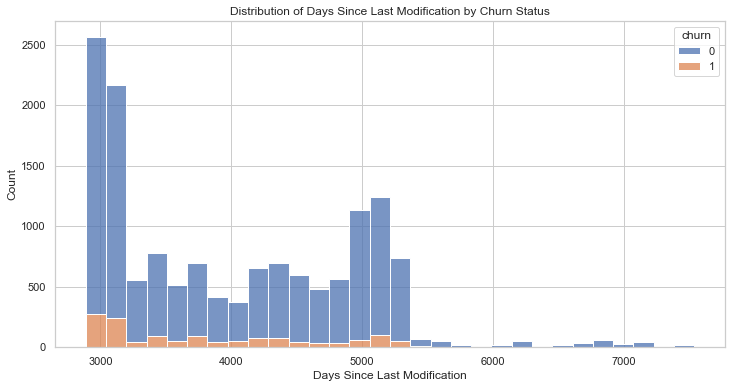

In [18]:
plt.figure(figsize=(12, 6))
current_date = pd.to_datetime('today')
client_df['days_since_modif'] = (current_date - client_df['date_modif_prod']).dt.days

# Distribution of days since last modification across churned and non-churned customers
sns.histplot(data=client_df, x='days_since_modif', hue='churn', multiple='stack', bins=30)
plt.title('Distribution of Days Since Last Modification by Churn Status')
plt.xlabel('Days Since Last Modification')
plt.ylabel('Count')
plt.show()

The higher number of non-churned customers shortly after a product modification could imply that modifying a product may be associated with a decreased likelihood of churn. Customers may perceive the modification as a positive change or a refresh in service, leading to increased satisfaction and retention. 

The pattern suggests that the risk of churn does not increase dramatically as more time passes since the last modification.

***The chart highlights opportunities for proactive engagement and retention strategies. By identifying periods where churn slightly increases, the company could target these customers with retention tactics.***

***4. Seasonality Analysis***

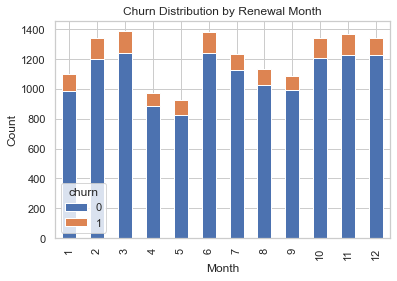

In [19]:
# month of contract renewal
client_df['renewal_month'] = client_df['date_renewal'].dt.month
month_churn_counts = client_df.groupby('renewal_month')['churn'].value_counts().unstack()
month_churn_counts.plot(kind='bar', stacked=True)
plt.title('Churn Distribution by Renewal Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

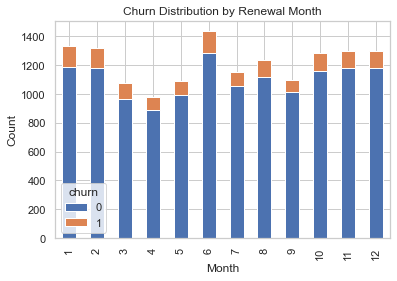

In [20]:
# month of contract active
client_df['activ_month'] = client_df['date_activ'].dt.month
month_churn_counts = client_df.groupby('activ_month')['churn'].value_counts().unstack()
month_churn_counts.plot(kind='bar', stacked=True)
plt.title('Churn Distribution by Renewal Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

***The churn rate does not exhibit significant variability based on the renewal month and active month. This could indicate that the decision to churn is not strongly influenced by seasonal factors, or that the effects of such factors are evenly distributed throughout the year.***

## Sub-Task 2

Our task right now is to verify the hypothesis of price sensitivity being to some extent correlated with churn. For this we would first need to define and calculate a measure of price sensitivity for each client.

We could define **price sensitivity as the percentage change in the price that a client has experienced over a certain period.** For instance, if the price for a client has increased by 5% from one period to the next, their price sensitivity score could be 5%.

For each client, calculate the percentage change in each price component (off-peak, peak, mid-peak) over the available time period.

Create an aggregate price sensitivity score for each client. This could be the average percentage change across all price components or a weighted average if we believe certain components are more impactful.
 
Finally, we would analyze the correlation between the calculated price sensitivity scores and churn status for each client.

In [21]:
# Assuming the price data includes multiple entries per client to observe price changes
# Group by 'id' and calculate the percentage change for each price-related column
price_df['price_off_peak_var_change'] = price_df.groupby('id')['price_off_peak_var'].pct_change()
price_df['price_peak_var_change'] = price_df.groupby('id')['price_peak_var'].pct_change()
price_df['price_mid_peak_var_change'] = price_df.groupby('id')['price_mid_peak_var'].pct_change()
price_df['price_off_peak_fix_change'] = price_df.groupby('id')['price_off_peak_fix'].pct_change()
price_df['price_peak_fix_change'] = price_df.groupby('id')['price_peak_fix'].pct_change()
price_df['price_mid_peak_fix_change'] = price_df.groupby('id')['price_mid_peak_fix'].pct_change()

In [22]:
# Fill NaN values that result from pct_change with 0, as there is no change for the first observation
price_df = price_df.fillna(0)

In [23]:
# Calculate an aggregate price sensitivity score for each client, e.g., mean of all price changes
price_df['price_sensitivity_score'] = price_df[
    ['price_off_peak_var_change', 'price_peak_var_change', 
     'price_mid_peak_var_change', 'price_off_peak_fix_change', 
     'price_peak_fix_change', 'price_mid_peak_fix_change']].mean(axis=1)

In [24]:
# Aggregate this score at the client level
price_sensitivity = price_df.groupby('id')['price_sensitivity_score'].mean().reset_index()

In [25]:
# Now, merge this with your client churn data
client_df = pd.merge(client_df, price_sensitivity, on='id', how='left')

In [26]:
# Correlation analysis between price sensitivity and churn
correlation_analysis = client_df[['price_sensitivity_score', 'churn']].corr()

In [27]:
print(correlation_analysis)

                         price_sensitivity_score     churn
price_sensitivity_score                 1.000000 -0.005455
churn                                  -0.005455  1.000000


This value is very close to zero, indicating that there is almost **no linear relationship between the calculated measure of price sensitivity and churn in this dataset.** Since the correlation is negative, it suggests a very slight tendency that higher price sensitivity (as defined by the score) could be associated with a lower likelihood of churn, but this tendency is so weak that it is likely not statistically significant.

The hypothesis that price sensitivity is correlated with churn is not supported by this data, at least not by the measure of price sensitivity used here. The price sensitivity score, calculated as the average percentage change in prices, does not appear to be a significant predictor of whether clients will churn.

=======================================================================================================================

Let us try to do some further analysis to cross check if the constructed price sensitivity score captures the churn properly. We will try to Group Clients. Segmenting clients based on price sensitivity score groups such as low, medium and high sensitivity, might give us a chance to compare churn rates across these segments.

In [28]:
# Define the thresholds for low, medium, and high sensitivity
low_threshold = client_df['price_sensitivity_score'].quantile(0.33)
high_threshold = client_df['price_sensitivity_score'].quantile(0.66)

Here, we chose quantiles as specific cutoffs based on normal segmenting ideology. But choosing other specific values of cutoffs based on business logic or statistical reasoning might give slightly different results.

In [29]:
# Create the price sensitivity segment
client_df['price_sensitivity_segment'] = pd.cut(client_df['price_sensitivity_score'], 
                                                bins=[-float('inf'), low_threshold, high_threshold, float('inf')], 
                                                labels=['Low', 'Medium', 'High'])

In [30]:
# Calculate churn rate by price sensitivity segment
churn_rate_by_segment = (client_df.groupby('price_sensitivity_segment')['churn'].mean())*100

In [31]:
print(churn_rate_by_segment)

price_sensitivity_segment
Low       10.516490
Medium     9.190871
High       9.446123
Name: churn, dtype: float64


Low Price Sensitivity Segment: This group has a churn rate of approximately 10.52%. It's the highest churn rate among the three groups, suggesting that customers in this segment, despite being labeled as having low price sensitivity, are churning at a higher rate than the others.

The data does not show a straightforward linear relationship where increased price sensitivity correlates with higher churn rates. In fact, the segment labeled as having low price sensitivity has the highest churn rate, which might seem **counterintuitive**.

**This could suggest that the measure of price sensitivity used may not fully capture the construct of price sensitivity as it relates to churn, or other factors may be influencing churn more strongly.**